# k-NN with sklearn

This notebook was written by Gael Lederrey and Tim Hillel (tim.hillel@epfl.ch) for the Decision-aid methodologies in transportation course at EPFL (http://edu.epfl.ch/coursebook/en/decision-aid-methodologies-in-transportation-CIVIL-557).

Please contact before distributing or reusing the material below.

## Overview

Now that we've implemented the k-NN algorithm, we will see how to use it with the `scikit-learn` library. In this notebook, we will learn to:

1. Scale data using scikit-learn
2. Use classifiers from scikit-learn
3. Test different model hyperparameters
4. Use different metrics to assess the performance of your model


## Set-up

We start by loading the dataset and the different libraries that are required for the exercices.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df_full = pd.read_csv('data/dataset.csv')

# We subsample the dataset to reduce the computational cost
df = df_full.sample(10000, random_state = 123)

We use the multinomial version of the dataset

In [3]:
# Dictionary used to transform the string in 
# the travel_mode to an integer
str_to_val = {
    'walk': 0,
    'cycle': 1,
    'pt': 2,
    'drive': 3
}

# Output
y = df['travel_mode'].replace(str_to_val).values

# Features (4 are selected)
x = df[['age', 'car_ownership', 'distance', 'female']].values

# We split the output and features into a train and a test set by 
# an (approximate) ratio of 0.8
np.random.seed(123)
msk = np.random.rand(len(df)) < 0.8

x_train_unscaled = x[msk]
x_test_unscaled = x[~msk]

y_train = y[msk]
y_test = y[~msk]

## k-NN with scikit-learn

In this section, we will use the $k$-NN from ``sklearn`` and compare the results to our implementation in the previous notebook.

The `KNeighborsClassifier` is in the ``neighbors`` submodule of sklearn. Try importing it directly.

Notice the *CamelCase*? This tells us we are using a class! (Like `DataFrame` in Pandas)

In [4]:
# Enter your code below
from sklearn.neighbors import KNeighborsClassifier

sklearn classes all behave in a very simular way (including classifiers, regressers, scalers, etc.)

Firstly, we *instantiate* the class (i.e. create an instance). Try using the *help* functionality to investigate the hyperparameters and default values.

In [5]:
knn = KNeighborsClassifier()

Next, we `fit` the class to the training data. (Note, this doesn't actually do anything for $k$-NN, as our model is simply the data!)

In [6]:
knn.fit(x_train_unscaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Finally, we use the class on new data. For classifiers, we use them to **predict** new data.

In [7]:
y_pred = knn.predict(x_test_unscaled)

Let's define our accuracy score function again, and use it to compare the results of the skleanr model to our implimentation!

In [8]:
def compute_accuracy(y_true, y_pred):
    return np.mean(np.array(y_true)==np.array(y_pred))*100

print("Accuracy: {:.3f}%".format(compute_accuracy(y_test, y_pred)))

Accuracy: 53.756%


Great, we get exactly the same score (for the multinomial case)!

This is because we used the same *hyperparameters*!

## Scaling data

As discussed, $k$-NN is highly sensitive to data scaling. As such, we will use the standard scaler from scikit-learn to scale the data to zero-mean unit-variance.

The `StandardScaler` is in the preprocessing submodule of sklearn. Try importing it directly, instantiating it, and fitting it to `x_train_unscaled`.

In [9]:
# enter your code below
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(x_train_unscaled)

/home/timmy/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

Instead of `predict`, we use the scaler to `transform` data.

Use the fitted scaler to transform `x_train_unscaled` and `x_test_unscaled` and save it as `x_train` and `x_test` respectively

In [10]:
# enter your code below
x_train = scl.transform(x_train_unscaled)
x_test = scl.transform(x_test_unscaled)

/home/timmy/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Now try using the `knn` to the scaled data, and see how the results have changed!

You should get an accuracy score of 65.457%!

In [11]:
# enter your code below
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: {:.3f}%".format(compute_accuracy(y_test, y_pred)))

Accuracy: 65.457%


## Accuracy, Precision, and Recall

As discussed, accuracy is not always the best policy. 

Let's investigate some other metric, based on the `confusion_matrix`

Firstly, import the function `confusion_matrix` from `metrics` submodule of `sklearn`, and display the confusion matrix for the predicted values `y_pred` and ground truth values `y_test` for the test data.  

In [12]:
# enter your code below
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[190,   2,  38,  91],
       [ 10,   2,  18,  23],
       [ 61,   6, 486, 174],
       [ 79,   7, 167, 603]])

We recall that (for a single class):

`precision = TP/TP+FP
recall = TP/TP+FN`

Write functions to compute the precision and recall for a given class, from the confusion matrix.


In [13]:
def compute_precision(y_true, y_pred, c):
    # Enter your code below
    
    conf_mat = confusion_matrix(y_true, y_pred)
    precision = conf_mat[c,c]/sum(conf_mat[:,c])
    
    return precision

In [14]:
def compute_recall(y_true, y_pred, c):
    # Enter your code below
    
    conf_mat = confusion_matrix(y_true, y_pred)
    recall = conf_mat[c,c]/sum(conf_mat[c,:])
    
    return recall

Try printing the precision and recall for the `pt` mode. You should get 0.685 and 0.669 respectively.

In [15]:
# enter your code below
print("Precision: {:.3f}".format(compute_precision(y_test, y_pred, 2)))
print("Recall: {:.3f}".format(compute_recall(y_test, y_pred, 2)))

Precision: 0.685
Recall: 0.669


Use a list comprehension to get the precision and recall for each class.

In [16]:
# enter your code below
print("Precision: {}".format([compute_precision(y_test, y_pred, i) for i in range(4)]))
print("Recall: {}".format([compute_recall(y_test, y_pred, i) for i in range(4)]))

Precision: [0.5588235294117647, 0.11764705882352941, 0.685472496473907, 0.6767676767676768]
Recall: [0.5919003115264797, 0.03773584905660377, 0.6685006877579092, 0.7044392523364486]


We can use the function `precision_recall_fscore_support` to verify our answer

In [17]:
from sklearn.metrics import precision_recall_fscore_support

prec, rec, fscore, supp = precision_recall_fscore_support(y_test, y_pred)

print("Precision: {}".format(prec))
print("Recall: {}".format(rec))

Precision: [0.55882353 0.11764706 0.6854725  0.67676768]
Recall: [0.59190031 0.03773585 0.66850069 0.70443925]


## Model optimisation

We can investigate the effects of the hyperparameters on model performance. 

### $k$

Let's try investigating the effect `k` on the model. Try testing mutliple values of `k` (e.g. between 1 and 50) and comment on the results. 

For now, use accuracy as the performance metric to focus on(!)

*Hint*: It could be useful to plot a graph.

**Solution starts here!**

In [18]:
acc = []
for k in np.arange(1, 51):
    knn=KNeighborsClassifier(n_neighbors = k)

    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc.append(compute_accuracy(y_test, y_pred))

Text(0,0.5,'Accuracy [%]')

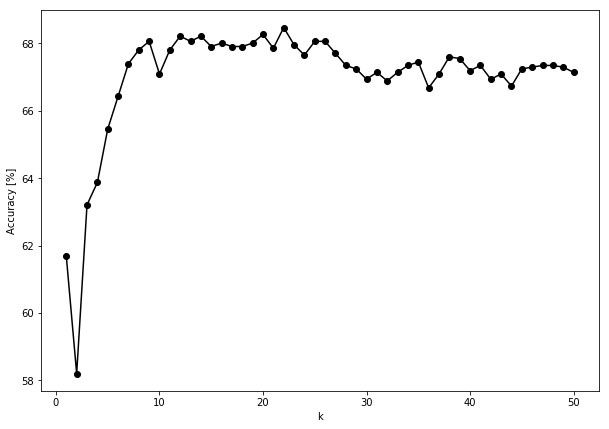

In [19]:
plt.figure(figsize=(10,7))

plt.plot(np.arange(1,51), acc, 'ko-')
plt.xlabel('k')
plt.ylabel('Accuracy [%]')

What was your best value of $k$? Is it the same as others in the class?

In [20]:
# Fill your code below

print("Best k = {}".format(np.argmax(acc)+1))

Best k = 22


### (Bonus) Repeated trials

In order to to estimate the confidence interfals for our performance estimates, we could test the multiple on multiple draws from the dataset, *i.e.* draw the train and test sets multiple times. 

*Note, there are other ways to do this, which we will discuss later in the course*

**Solution starts here!**

In [21]:
accuracy = []
draws = 10
for d in range(draws):
    print("Run: {}/{}".format(d+1,draws))
    msk_rnd = np.random.rand(len(df)) < 0.8
    
    x_train_rnd_unscaled = x[msk_rnd]
    x_test_rnd_unscaled = x[~msk_rnd]
    
    #scale data
    scl.fit(x_train_rnd_unscaled)
    x_train_rnd = scl.transform(x_train_rnd_unscaled)
    x_test_rnd = scl.transform(x_test_rnd_unscaled)

    y_train_rnd = y[msk_rnd]
    y_test_rnd = y[~msk_rnd]

    for k in np.arange(1, 51):
        
        if d == 0:
            accuracy.append([])

        knn=KNeighborsClassifier(n_neighbors = k)

        knn.fit(x_train_rnd, y_train_rnd)
        y_pred = knn.predict(x_test_rnd)
        accuracy[k-1].append(compute_accuracy(y_test_rnd, y_pred))
        
print("Finished")

Run: 1/10


/home/timmy/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Run: 2/10
Run: 3/10
Run: 4/10
Run: 5/10
Run: 6/10
Run: 7/10
Run: 8/10
Run: 9/10
Run: 10/10
Finished


In [22]:
# Fill your code below

avg = [np.mean(acc) for acc in accuracy]
err_low = [avg[i]-np.percentile(acc, 25) for i, acc in enumerate(accuracy)]
err_high = [np.percentile(acc, 75)-avg[i] for i, acc in enumerate(accuracy)]

Text(0,0.5,'Accuracy [%]')

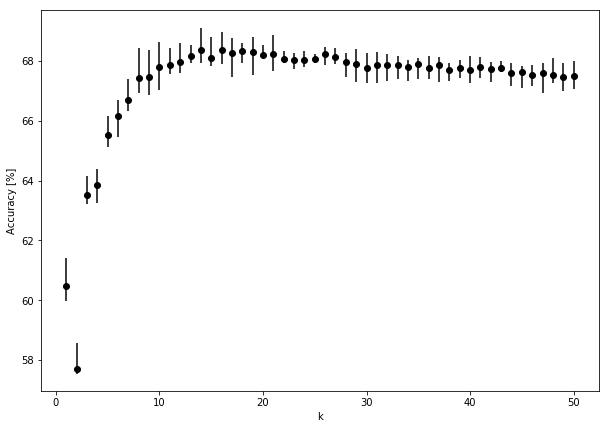

In [23]:
# Fill your code below

plt.figure(figsize=(10,7))

plt.errorbar(np.arange(1,51), avg, yerr=[err_low, err_high], fmt='ko',  capthick=2)
plt.xlabel('k')
plt.ylabel('Accuracy [%]')

### (Bonus) Other hyperparameters 

Try experimenting with the other hyperparameters in $k$-NN (use the documentation!). 

E.g. what happens if we use distance based weightings? Does the optimal value of $k$ change?

**Solution starts here!**

In [24]:
# Now, we want to test multiple hyperparameters

results = []

k_vals = np.arange(1, 51)
weights = ['uniform', 'distance']

draws = 10

for d in range(draws):
    
    print("Start {}/{}".format(d+1, draws))
    msk_rnd = np.random.rand(len(df)) < 0.8

    x_train_rnd_unscaled  = x[msk_rnd]
    x_test_rnd_unscaled = x[~msk_rnd]
    
    #scale data
    scl.fit(x_train_rnd_unscaled)
    x_train_rnd = scl.transform(x_train_rnd_unscaled)
    x_test_rnd = scl.transform(x_test_rnd_unscaled)

    y_train_rnd = y[msk_rnd]
    y_test_rnd = y[~msk_rnd]
    
    idx = 0
    for k in k_vals:
        
        for w in weights:
            
            if d == 0:
                results.append({'params': {'k': k, 'weights': w}, 'acc': []})

            knn=KNeighborsClassifier(n_neighbors = k, weights=w)

            knn.fit(x_train_rnd, y_train_rnd)
            y_pred = knn.predict(x_test_rnd)
            results[idx]['acc'].append(compute_accuracy(y_test_rnd, y_pred))
            
            idx += 1
        
print("Finished")

Start 1/10


/home/timmy/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Start 2/10
Start 3/10
Start 4/10
Start 5/10
Start 6/10
Start 7/10
Start 8/10
Start 9/10
Start 10/10
Finished


In [25]:
for i, vals in enumerate(results):
    results[i]['mean'] = np.mean(vals['acc'])
    results[i]['median'] = np.median(vals['acc'])

In [26]:
param = results[np.argmax([res['median'] for res in results])]['params']
print(param)

{'k': 33, 'weights': 'distance'}


In [27]:
knn=KNeighborsClassifier(n_neighbors = param['k'], weights = param['weights'])

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: {:.3f}%".format(compute_accuracy(y_test, y_pred)))

Accuracy: 68.268%
